In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

import nltk
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

import gensim

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_preprocessed.csv', lineterminator='\n')

### Stemming

In [3]:
stemmer = nltk.stem.SnowballStemmer('english')

### Stop Words

In [4]:
stop_words = ENGLISH_STOP_WORDS.union(['Facebook', 'facebook'])

### Tokenize

In [5]:
def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

### Lemmatize

In [6]:
def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

## Topic Modeling

In [7]:
df['tokenized_tweets'] = df['content'].apply(tokenize)

In [8]:
df['tokenized_tweets'] = df['tokenized_tweets'].apply(lambda x: (' '.join(x)))

In [9]:
df['tokenized_tweets'] = df['tokenized_tweets'].apply(lambda x: stemmer.stem(x))

In [10]:
corpus = df['tokenized_tweets'].fillna(value='')

In [11]:
tfidf = TfidfVectorizer(stop_words=stop_words)
tweet_word_matrix = tfidf.fit_transform(corpus)
vocab = tfidf.get_feature_names()

### NMF

In [12]:
n_components = 50
nmf = NMF(n_components=n_components)

nmf.fit(tweet_word_matrix)

NMF(n_components=50)

In [13]:
tweet_topic_matrix = nmf.transform(tweet_word_matrix)

In [14]:
tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')

tweet_topic_matrix_df[['raw_tweet','tokenized_tweets']] = df[['raw_tweet', 'tokenized_tweets']]
tweet_topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,raw_tweet,tokenized_tweets
0,0.000002,0.000337,0.000000,0.000002,0.000216,0.000052,0.000000,0.000003,0.0,0.000000,...,0.000295,0.000394,0.006729,0.000239,0.000000,0.002167,0.000194,0.000010,To continually grow it audience &amp; make mor...,continually grow audience bend governments cri...
1,0.000000,0.000000,0.000322,0.000000,0.000426,0.000000,0.001726,0.000000,0.0,0.000000,...,0.001180,0.000757,0.000776,0.000063,0.000000,0.000329,0.000000,0.000674,My Linktr making it easier to follow my social...,linktr make easier follow soci
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.109044,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,#giftsforher #tumblr #twitter #facebook #insta...,order
3,0.000000,0.000000,0.000000,0.160304,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,#linkedin #twitter #facebook #instagram #dogec...,purchas
4,0.000000,0.000000,0.000209,0.000000,0.000115,0.000450,0.000313,0.000021,0.0,0.000166,...,0.001746,0.000639,0.000350,0.000146,0.000279,0.002717,0.000247,0.000410,Quit Your Job With These 3 Winning #Facebook #...,quit job win secret


In [15]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
aaa,0.000000,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.006327,0.000000e+00,...,0.000000,0.003469,0.000000,0.000577,0.0,0.000245,0.001074,0.000000,0.000763,1.760548e-03
aaaaaaaaaaaand,0.000000,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
aaaaaaand,0.000000,0.0,0.000199,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000018,0.000000,0.000102,0.000000e+00
aaaaaand,0.000000,0.0,0.000000,0.0,0.0,2.716295e-07,0.0,0.0,0.000000,4.795716e-07,...,0.000053,0.000000,0.000240,0.000000,0.0,0.000000,0.000000,0.000110,0.000004,0.000000e+00
aaaaah,0.000415,0.0,0.000000,0.0,0.0,1.812299e-04,0.0,0.0,0.000000,0.000000e+00,...,0.000092,0.000073,0.000065,0.000000,0.0,0.000000,0.000014,0.000085,0.000000,5.324884e-07


### Topic interpretation

In [16]:
word_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
meta,10.775296,0.0,0.000000,0.000000,0.000000,0.015313,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rename,0.381713,0.0,0.034828,0.000000,0.000000,0.000000,0.008597,0.000000,0.00000,0.000033,...,0.000000,0.005451,0.000000,0.000000,0.023499,0.000000,0.000000,0.023354,0.000000,0.003218
rebranding,0.257251,0.0,0.042529,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rebrands,0.204633,0.0,0.003522,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
welcome,0.178120,0.0,0.000000,0.000000,0.051713,0.000000,0.000000,0.001143,0.00000,0.000000,...,0.000000,0.000000,0.064420,0.000000,0.000000,0.000000,0.134763,0.000000,0.000000,0.000000
verse,0.156767,0.0,0.000000,0.000000,0.000000,0.000000,0.027826,0.000492,0.00021,0.001665,...,0.042936,0.000000,0.008142,0.000000,0.007497,0.014348,0.006282,0.013155,0.010838,0.011011
facebookapp,0.155790,0.0,0.000000,0.000325,0.000000,0.003332,0.005715,0.001186,0.00000,0.000746,...,0.004744,0.007696,0.005154,0.005641,0.014531,0.004594,0.000000,0.006367,0.000000,0.000000
zuckerberg,0.140487,0.0,4.284286,0.000008,0.000000,0.000000,0.198510,0.000000,0.00000,0.003003,...,0.095861,0.000000,0.000000,0.000000,0.110395,0.000000,0.000000,0.135363,0.000000,0.133278
rebranded,0.117817,0.0,0.000000,0.000000,0.008572,0.000000,0.002390,0.000000,0.00000,0.000000,...,0.000000,0.000783,0.000000,0.000000,0.002833,0.000000,0.000000,0.000000,0.000000,0.000000
whatsapp,0.114647,0.0,0.000000,0.000000,0.000000,0.042241,0.028149,0.000000,0.00000,0.001955,...,0.000000,0.012314,0.004094,0.000000,0.003605,0.000000,0.000000,0.000493,0.006404,0.000000


In [17]:
def top_tweets(tweet_topic_matrix_df, topic, n_tweets):
    return (tweet_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_tweets)['raw_tweet']
            .values)

def top_words(word_topic_matrix_df, topic, n_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_words))[topic]

In [18]:
topics = []
for topic_num in list(range(n_components)):
    topics.append('topic_' + str(topic_num))

for topic in topics:
    print(topic + '\n')
    for tweet in top_tweets(tweet_topic_matrix_df, topic, 10):
        print(tweet, '\n')
    print(top_words(word_topic_matrix_df, topic, 10), '\n\n')

topic_0

what is meta?
#gearup #gearupdigitally #facebook #meta #facebookbecomemeta #whatismeta https://t.co/2tYxTYfrte 

Facebook is ‘Meta’ now!! #Facebook 

Well...
how
META
of
them!

#meta 

@Facebook is now Meta!!!

#facebook #meta #blockchain #metaverse #nft #crypto https://t.co/hVIDyG9Viw 

The Facebook&gt; Facebook &gt; Meta 
#Metaverse #Meta https://t.co/TtN8rOHSu1 

Facebook Is Now Meta
#Meta https://t.co/TxPZ1nkeu8 

How Meta... #Facebook #Meta #MarkZuckerberg https://t.co/7CsXzZp6sK 

That's so meta of them...
#Facebook #meta 

What is meta?
#Meta 

So it's "Meta"!

#Facebook https://t.co/jxO6L5GU2s 

meta           10.775296
rename          0.381713
rebranding      0.257251
rebrands        0.204633
welcome         0.178120
verse           0.156767
facebookapp     0.155790
zuckerberg      0.140487
rebranded       0.117817
whatsapp        0.114647
Name: topic_0, dtype: float64 


topic_1

So then, which #Metaverse projects are going #ToTheMoon? 🚀🌖

#TheMetaverse #Meta #Crypto

like         8.411690
sound        0.758567
feel         0.705935
follow       0.433866
retweet      0.343664
forget       0.266749
post         0.251583
rise         0.238126
token        0.202650
gentlemen    0.199702
Name: topic_6, dtype: float64 


topic_7

#linkedin #twitter #facebook #instagram #tumblr #gifting #socialmedia #pinterest #dogecoin #reddit #gift #gifts #giftideas #shop #shopping #affiliatemarketing #bitcoin Shop #gifts &amp; #baskets https://t.co/dnN7uRmi6e 

#linkedin #twitter #facebook #instagram #tumblr #socialmedia #pinterest #dogecoin #reddit #gift #shoppingaddict #gifts #giftideas #shop #shopping #affiliatemarketing #bitcoin Shop #gifts &amp; #baskets https://t.co/dnN7uRmi6e 

#linkedin #twitter #facebook #instagram #tumblr #socialmedia #pinterest #dogecoin #reddit #gift #gifts #giftideas #giftsforher #shop #shopping #affiliatemarketing #bitcoin Shop #gifts &amp; #baskets https://t.co/dnN7uRmi6e 

#linkedin #twitter #facebook #instagram #tumblr #socialmedia #pi

topic_10

Metaverse in one pic?

#metaverse #virtualreality #virtualworld #virtuallife #Transhumanism https://t.co/4JSpDYdYyh 

Metaverse is his goal
#nft #nftartist #xircus #metaverse #theexplorer #explorer https://t.co/KXnr0sSPHQ 

Metaverse By Facebook
https://t.co/kwmJrohUS2
#Metaverse #Meta #Facebook #technology #VRHeadset 

The metaverse is not real #Metaverse https://t.co/Gm1AUkEhwr 

Me: Boy i'm sure tired of the word "metaverse" already...
Mark Zuckerberg: "Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Metaverse, Meta..." 

1. There is only one Metaverse.
2: The Metaverse is for everyone.
3: Nobody controls the Metaverse.
4: The Metaverse is open.
5: The Metaverse is hardware-independent.
6: The Metaverse is a Network.
7: The Metaverse is the Internet. #Metaverse 

GM Metaverse!
 
(No, not you Zuckerberg!)

#NFTCommunity 

Zuckerberg: We're going to be metaverse first. N

3rd world is #Metaverse  and #web3 to me 💜 

Gm world 🌎 ❤

#nft #Metaverse #NFTGame 

#Meta #Gates World https://t.co/ERQbSDcFpx 

#Metaverse and the world is… https://t.co/1sRvAi4Gnd 

#Facebook, #Whatsapp and #Instagram down across the world. 

What if we are in the another world's of someone? #metaverse 
#NFTs #nftcollector #NFTCommunity 

#metaverse world 🧐 https://t.co/YWfsnGFPH2 

and so with the #METAVERSE WORLD 

#Meta world 
X X X 🙄 https://t.co/eZbaf3Li2Y https://t.co/Vqo2js6cHA 

#Mana &amp; #Facebook #RobloxDown &amp; the world of #cryptocurrecy https://t.co/WwAImFZpn0 

world       5.637986
virtual     0.649245
create      0.500021
fantasy     0.424158
horrible    0.384967
digital     0.349514
peac        0.311669
peace       0.294062
welcome     0.279917
compani     0.257232
Name: topic_17, dtype: float64 


topic_18

#meta Make Everything Trump again #trump #MakeEverythingTrumpAgain 

Make Everything Trump Again!

#MakeEverythingTrumpAgain #Meta #Metaverse #FacebookMeta 

Best one yet 🤣🤣
#META
#MakeEverythingTrumpAgain https://t.co/M5Khg8pGcs 

#RACA is the best #Metaverse ❤️❤️❤️ https://t.co/BFcFgoXKag 

Best one yet 🤣🤣 #meta #FacebookMeta https://t.co/ehAkXHGcQk 

Best one yet.  #FAANG is now #MANGA 
#Meta https://t.co/tjFAbzPPcR 

Best 👌 
#Facebook #meta #GodofWar #GodOfWarRagnarok https://t.co/z7m8ylCWeJ 

Which one is best name  ? 

#Meta 

The. Best. #Meta https://t.co/u8CNh0r5jx 

#Metaverse 
Best 🤣 https://t.co/GqZm5bXTZX 

https://t.co/lpGCcs2TWW

DM FOR BEST OFFER 💥 #modz #MODZreveal #Metaverse #nft #NFTCommmunity #nftcollector 

What is your best #Metaverse #domainforsale https://t.co/VGLUnz3vxu 

best              4.242286
doubt             1.229460
development       1.169396
implement         1.122032
clear             1.119280
professionally    1.104792
plan              0.821793
team              0.677729
professional      0.645840
experience        0.636156
Name: topic_26, dtype: float64 


topic_27

Did #Facebook really not see #MakeEve

market        3.227756
holders       2.320845
cap           1.569677
twitter       1.467463
nft           1.435586
black         1.152240
gateio        1.125496
burn          1.084778
place         1.070995
bscpitbull    1.050528
Name: topic_33, dtype: float64 


topic_34

#Metaverse is here and taking over 🚀🚀🚀🚀 #weyuworld let’s go #NFTs #Metaverse 🌎🌍🌏🪐 https://t.co/JLo1niU6mr 

#fb to #meta lets go #nft #metavers https://t.co/Dk91hH7RdL 

Lets just still call it facebook? #meta 

Let’s #meta on #Facebook 

#Meta lets go 

Let me gone get tf off #Meta 

Let’s go 🚀🚀🚀 #nftsarethefuture #nfts #metaverse https://t.co/ITxH2lIJxF 

Let's see what you've got!! 🥰🔥😜
#NFTs #NFT #nftcollector #NFTCommunity #nftcollectors #halloween2021 #Halloween #Metaverse #Meta #cryptoart https://t.co/qs7adHvaWj 

#Facebook is now #Meta

Let's do this! https://t.co/JI3HLvNHGr 

#Facebook CALL going up let’s go #Metaverse 

let        5.500988
build      0.396456
talk       0.333117
begin      0.262289
moon     

join            5.563736
metaverseinu    3.131830
guy             2.773674
miss            1.325014
dont            0.704705
bsc             0.682153
address         0.636742
happy           0.486446
discord         0.456521
awesome         0.342272
Name: topic_42, dtype: float64 


topic_43

#Facebook #Metaverse #Meta #FacebookConnect 😂 but is great i have to say it ❤ https://t.co/VnGrM6DIpK 

Great name, #Metaverse https://t.co/3jGuVsMLwX 

Great 

 #Airdrop #GameFi #NFT #PlayToEarn #Metaverse https://t.co/xsdbKy8RAH 

GREAT
#Airdrop #GameFi #NFT #PlayToEarn #Metaverse https://t.co/9a37z5Vjf2 

Great one.... 
#Airdrop #GameFi #NFT #PlayToEarn #Metaverse https://t.co/DAqXZGg2GE 

👏🏽👏🏽👏🏽 Great 🧵👇🏽#Metaverse #Web3 https://t.co/9J9werB6oh 

#Airdrop #GameFi #NFT #PlayToEarn #Metaverse GREAT GREAT GREAT https://t.co/4bw3CLdEau 

#META #MakeEveryTrumpAgain  great #acronym https://t.co/d7Quy989ZC 

Great going... #SPAT #Metaverse #MetaSpatial #NFTs https://t.co/R4L4mRVT5O 

Great name 🤣🤣🤣🤣🤣

In [19]:
ttm_analysis = tweet_topic_matrix_df.copy()

In [20]:
ttm_analysis.head() 

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,raw_tweet,tokenized_tweets
0,0.000002,0.000337,0.000000,0.000002,0.000216,0.000052,0.000000,0.000003,0.0,0.000000,...,0.000295,0.000394,0.006729,0.000239,0.000000,0.002167,0.000194,0.000010,To continually grow it audience &amp; make mor...,continually grow audience bend governments cri...
1,0.000000,0.000000,0.000322,0.000000,0.000426,0.000000,0.001726,0.000000,0.0,0.000000,...,0.001180,0.000757,0.000776,0.000063,0.000000,0.000329,0.000000,0.000674,My Linktr making it easier to follow my social...,linktr make easier follow soci
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.109044,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,#giftsforher #tumblr #twitter #facebook #insta...,order
3,0.000000,0.000000,0.000000,0.160304,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,#linkedin #twitter #facebook #instagram #dogec...,purchas
4,0.000000,0.000000,0.000209,0.000000,0.000115,0.000450,0.000313,0.000021,0.0,0.000166,...,0.001746,0.000639,0.000350,0.000146,0.000279,0.002717,0.000247,0.000410,Quit Your Job With These 3 Winning #Facebook #...,quit job win secret


In [21]:
df['topic']= ttm_analysis.iloc[:,:n_components].idxmax(axis=1)

In [22]:
df.head()

,Unnamed: 0,user,content,raw_tweet,tokenized_tweets,topic
0,0,58010461,to continually grow it audience make more ...,To continually grow it audience &amp; make mor...,continually grow audience bend governments cri...,topic_44
1,1,1393628979526094851,my linktr making it easier to follow my social...,My Linktr making it easier to follow my social...,linktr make easier follow soci,topic_33
2,2,617853906,on orders over at,#giftsforher #tumblr #twitter #facebook #insta...,order,topic_9
3,3,617853906,on purchases over at,#linkedin #twitter #facebook #instagram #dogec...,purchas,topic_3
4,4,812704308089208832,quit your job with these winning secrets,Quit Your Job With These 3 Winning #Facebook #...,quit job win secret,topic_20


In [23]:
df.topic.describe()

count      212778
unique         50
top       topic_2
freq        19204
Name: topic, dtype: object

In [24]:
df['topic'].value_counts(normalize=True) * 100

topic_2     9.025369
topic_1     3.854252
topic_0     3.709970
topic_22    3.309083
topic_38    3.125323
topic_5     3.066576
topic_19    3.062817
topic_43    3.005480
topic_4     2.824070
topic_32    2.623392
topic_27    2.572634
topic_48    2.547256
topic_47    2.512948
topic_16    2.202295
topic_41    2.193366
topic_26    2.154828
topic_44    2.123810
topic_17    2.058483
topic_49    2.029345
topic_46    1.994097
topic_10    1.986108
topic_45    1.912792
topic_42    1.891643
topic_13    1.876604
topic_29    1.842766
topic_36    1.706003
topic_34    1.642557
topic_20    1.620938
topic_39    1.615769
topic_21    1.545743
topic_6     1.489816
topic_25    1.480416
topic_8     1.464907
topic_40    1.447048
topic_33    1.430599
topic_12    1.377022
topic_24    1.308406
topic_31    1.281147
topic_15    1.271278
topic_11    1.214881
topic_30    1.145795
topic_18    0.940417
topic_37    0.925848
topic_35    0.925378
topic_23    0.918798
topic_28    0.906579
topic_9     0.865691
topic_3     0

In [25]:
topic_name_dict = {'topic_0': 'Meta Rebrand', 'topic_2': 'Trust in Zuckerberg?', 'topic_10': 'Vision', 
                  'topic_17': 'Future world', 'topic_18': 'Make Everything Trump Again', 
                  'topic_29': 'Want Meta?', 'topic_32': 'Connect people?', 
                   'topic_33': 'Gaming', 'topic_34': 'join Meta?', 'topic_35': 'Resentment', 
                   'topic_39': 'Reality?', 'topic_42': 'Squid Game in Meta', 'topic_43': 'Thanks Facebook', 
                   'topic_44': 'Data Security', 'topic_45': 'Need for Meta?'}

In [26]:
# for keys,values in topic_name_dict.items():
#     df['topic'] = df['topic'].apply(lambda x: x.replace(keys, values))

In [27]:
def change_topic_name(row):
    if row['topic'] in topic_name_dict.keys():
        row['topic'] = topic_name_dict[row['topic']]
    else:
        pass
    return row

In [28]:
df = df.apply(change_topic_name, axis=1)

In [29]:
topic_probs = df['topic'].value_counts(normalize=True) * 100

In [30]:
from collections import defaultdict

In [31]:
int_topic_prob = defaultdict()
for topic, value in topic_probs.items():
    if topic in topic_name_dict.values():
        int_topic_prob[topic] = topic_probs[topic]

In [32]:
int_topic_prob = dict(int_topic_prob)

In [33]:
int_topic_prob

{'Trust in Zuckerberg?': 9.02536916410531,
 'Meta Rebrand': 3.7099700156971114,
 'Thanks Facebook': 3.0054798898382353,
 'Connect people?': 2.623391516040192,
 'Data Security': 2.1238097923657517,
 'Future world': 2.058483489834475,
 'Vision': 1.9861075863106148,
 'Need for Meta?': 1.912791735987743,
 'Squid Game in Meta': 1.8916429330099915,
 'Want Meta?': 1.8427656994614103,
 'join Meta?': 1.6425570312720301,
 'Reality?': 1.6157685475002115,
 'Gaming': 1.4305990280950098,
 'Make Everything Trump Again': 0.9404167724106816,
 'Resentment': 0.9253776236265027}

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

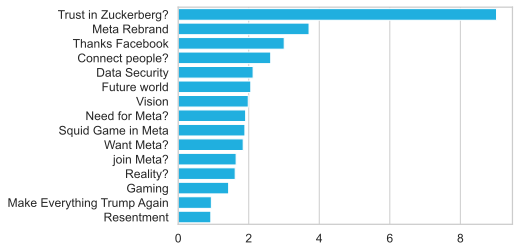

In [92]:
keys = list(int_topic_prob.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(value) for value in int_topic_prob.values()]
sns_plot = sns.barplot(x=vals, y=keys, color = 'deepskyblue')
plt.savefig('topic_probs.png', bbox_inches='tight', dpi = 500)

In [36]:
def create_wordcloud(wordcloud_series):
    df_text = ' '.join(str(wordcloud_series).lower() for v in wordcloud_series)
    wordcloud = WordCloud(stopwords = None, random_state = 20, background_color = 'white',
                      collocations=True).generate(df_text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()
    plt.savefig('wordcloud.png', dpi = 2000, bbox_inches='tight')

In [37]:
#!pip install wordcloud
from wordcloud import WordCloud

Meta Rebrand


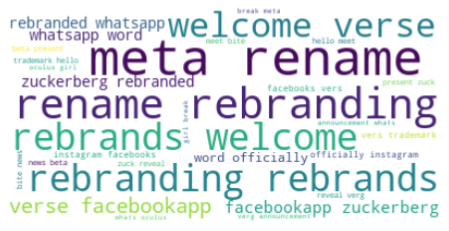

Trust in Zuckerberg?


<Figure size 432x288 with 0 Axes>

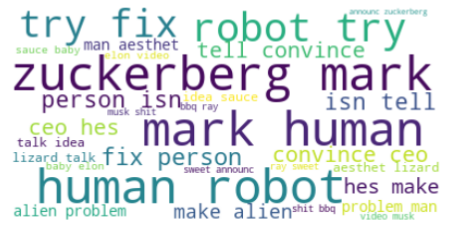

Vision


<Figure size 432x288 with 0 Axes>

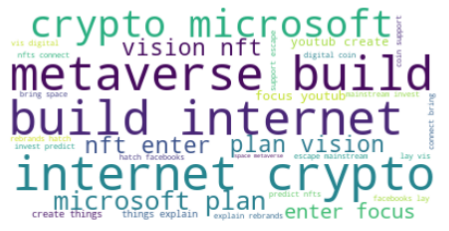

Future world


<Figure size 432x288 with 0 Axes>

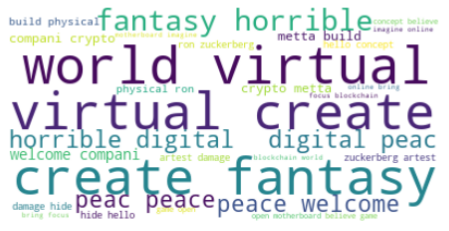

Make Everything Trump Again


<Figure size 432x288 with 0 Axes>

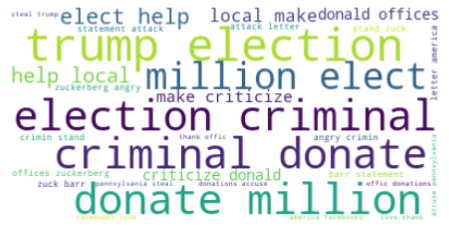

Want Meta?


<Figure size 432x288 with 0 Axes>

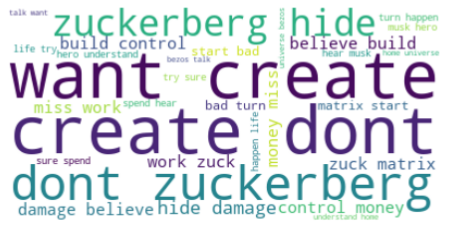

Connect people?


<Figure size 432x288 with 0 Axes>

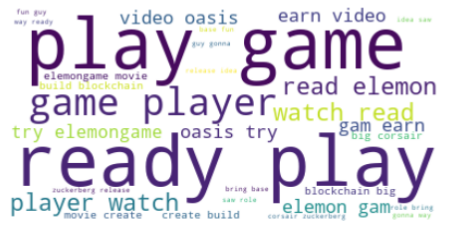

Gaming


<Figure size 432x288 with 0 Axes>

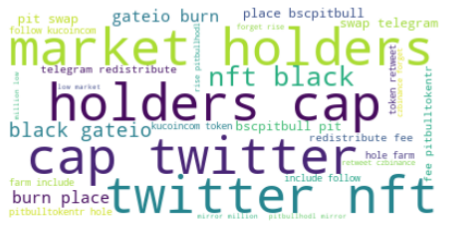

join Meta?


<Figure size 432x288 with 0 Axes>

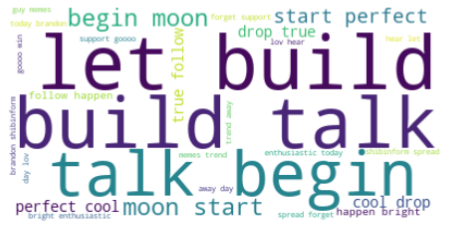

Resentment


<Figure size 432x288 with 0 Axes>

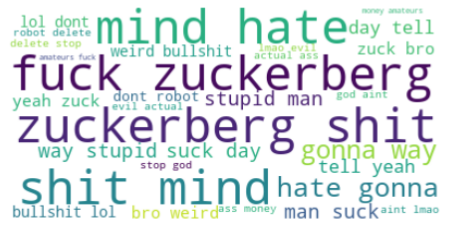

Reality?


<Figure size 432x288 with 0 Axes>

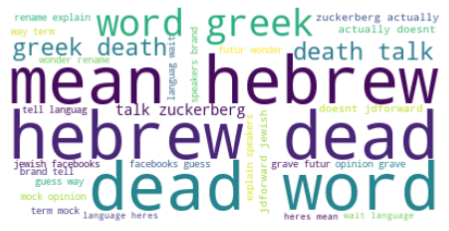

Squid Game in Meta


<Figure size 432x288 with 0 Axes>

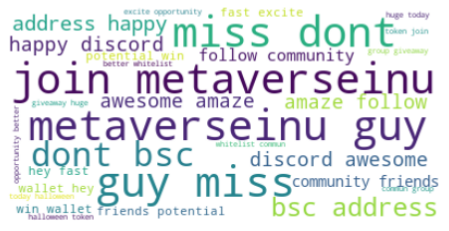

Thanks Facebook


<Figure size 432x288 with 0 Axes>

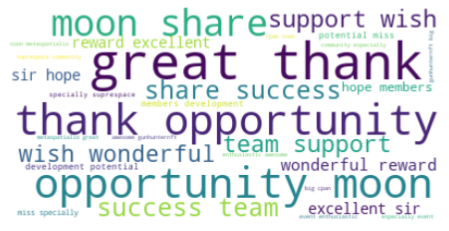

Data Security


<Figure size 432x288 with 0 Axes>

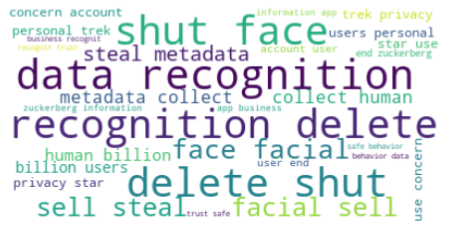

Need for Meta?


<Figure size 432x288 with 0 Axes>

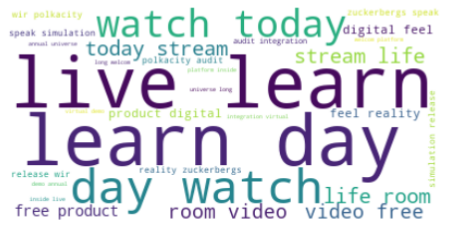

<Figure size 432x288 with 0 Axes>

In [38]:
for topic in topics:
    if topic in topic_name_dict.keys():
        topic_top_words = list(top_words(word_topic_matrix_df, topic, 30).index)
        words_list = ' '.join(word for word in topic_top_words)
        print(topic_name_dict[topic])
        create_wordcloud(words_list)